# <centre> ENEL 649-Random Variables and Stochastic Processes: Fall 2022 Project 

# <h3 align="center"> Syed Ahmad Sohail (UCID: 30136229)

In [2]:
#important Libraries
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import expon
from scipy.stats import norm
from scipy.stats import gamma
import scipy.stats as stats
from scipy.stats import expon
from scipy.stats import chi2



# Question 1
### Generate 100,000 samples of an exponentially distributed random variable with a mean of 8. Generate a histogram of these samples, normalize to have the same area as a PDF. Plot your histogram and the theoretical PDF function together on the same figure. They should match.


[ 2.73919846  1.33788388  4.85278766 ... 10.76558672  6.01420737
 12.05990112]


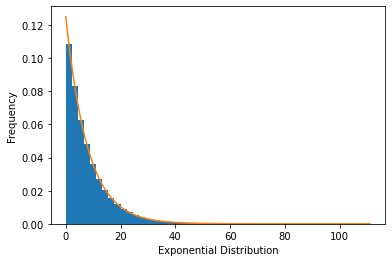

0.9999999999999998


In [3]:
# Using exponential() method
mean=8
rg_ex = np.random.exponential(8, 100000)
print(rg_ex)


# In[45]:


#Ploting the histogram with pyplot 
bins=50
count, bins, ignored = plt.hist(rg_ex, bins, density = True)
plt.xlabel("Exponential Distribution")
plt.ylabel("Frequency")
# Exponential Distribution
x_axis_th = np.linspace(np.min(rg_ex), np.max(rg_ex), 100000)
y_axis_th = (1/8)*np.exp(-(1/8)*x_axis_th)
plt.plot(x_axis_th, y_axis_th, label="Theoretical")
plt.show() 
area = sum(np.diff(bins)*count)
print(area)


# Question 2
### Generate 100,000 samples of the sum of 2, 6 and 50 exponentially distributed random variables, each with a mean of 6. Create histograms of each sum, normalize to have the same area as a PDF and plot. For each distribution, choose the number of histogram bins that produce plots that clearly show the shape of the distribution

In [4]:
#for 2 RV
A= np.random.exponential(6, 100000) + np.random.exponential(6, 100000)
#for 6 RV
B= np.random.exponential(6, 100000) + np.random.exponential(6, 100000)+ np.random.exponential(6, 100000)+ np.random.exponential(6, 100000)+ np.random.exponential(6, 100000)+ np.random.exponential(6, 100000)
C=0
#for 50 RV
for i in range(0,49):
    C = C + np.random.exponential(6, 100000) 



Text(0, 0.5, 'Frequency')

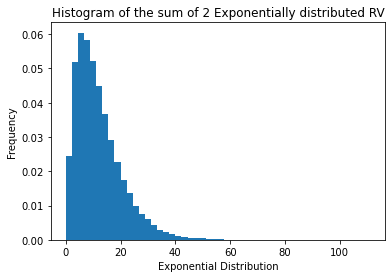

In [5]:
P_A=plt.hist(A, bins, density = True)
plt.title("Histogram of the sum of 2 Exponentially distributed RV")
plt.xlabel("Exponential Distribution")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

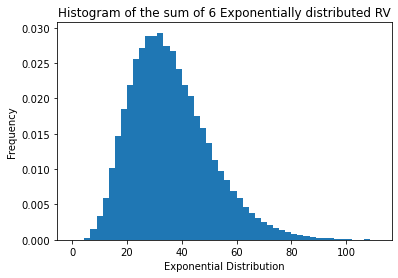

In [6]:
P_B=plt.hist(B, bins, density = True)
plt.title("Histogram of the sum of 6 Exponentially distributed RV")
plt.xlabel("Exponential Distribution")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

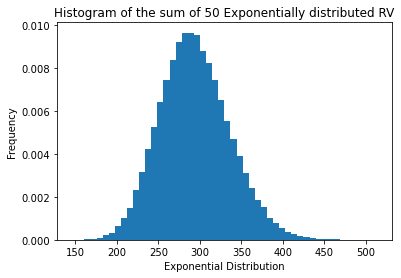

In [7]:
P_C=plt.hist(C, 50, density = True)
plt.title("Histogram of the sum of 50 Exponentially distributed RV")
plt.xlabel("Exponential Distribution")
plt.ylabel("Frequency")

# Question 3
### Apply a Chi-squared goodness-of-fit test to see if the random vector you generated in Problem 1 matches a theoretical exponential distribution. Your test should calculate and display a confidence value that should reveal your vector of random numbers does match an exponential distribution.

[ 4.55299537  7.70096588  9.0187836  ...  0.69797032 11.73865589
  2.39542206]
e_k shape (50,)
h_k shape (50,)
confidence = 1.0


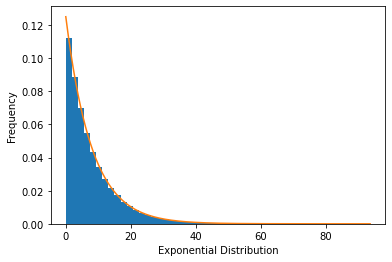

In [8]:
# Using exponential() method
mean=8
rg_ex = np.random.exponential(8, 100000)
print(rg_ex)

#Ploting the histogram with pyplot 
bins=50
h_k, bins, ignored = plt.hist(rg_ex, bins, density = True)
plt.xlabel("Exponential Distribution")
plt.ylabel("Frequency")
# print(bins)
# Exponential Distribution
x_axis_th = np.linspace(np.min(rg_ex), np.max(rg_ex), 100000)
y_axis_th = (1/8)*np.exp(-(1/8)*x_axis_th)
plt.plot(x_axis_th, y_axis_th, label="Theoretical")

e_k = (1/8)*np.exp(-(1/8)*bins[:-1]) #-1 because adding the last edge if not
print("e_k shape", e_k.shape)
print("h_k shape", h_k.shape)

c = np.sum(((h_k - e_k)**2)/e_k) #fit metric
bins = 50
dof = bins - 1
confidence = 1 - chi2.cdf(c, dof) #gammainc 
print("confidence =", confidence)


# Question 4
### Apply a Chi-squared goodness-of-fit test to the sum of 50 exponentially distributed random vectors from Problem 2 and see if it matches a Gaussian theoretical distribution. In your PDF file, comment on what these results say about the utility of the central limit theorem in this particular case.


300
1792.660492668944
42.339821594675435
e_k shape (50,)
h_k shape (50,)
confidence = 1.0


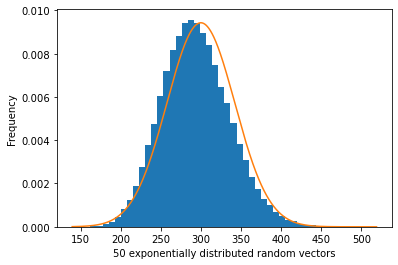

In [9]:

# Using exponential() method
mean=6
C=0
final_mean = mean*50 #approx value of mean
final_variance = np.var(np.random.exponential(6, 100000))*50 #approximating from one RV
final_stdev = np.sqrt(final_variance) #standard daviation
for i in range(0,49):
    C = C + np.random.exponential(6, 100000)
print(final_mean)
print(final_variance)
print(final_stdev)



#Ploting the histogram with pyplot 
bins=50
h_k, bins, ignored = plt.hist(C, bins, density = True)
plt.xlabel("50 exponentially distributed random vectors")
plt.ylabel("Frequency")

# Sum of 50 Exponential RV Distribution
x_axis_th = np.linspace(np.min(C), np.max(C), 100000)
y_axis_th = 1/(final_stdev*np.sqrt(2*np.pi))*np.exp(-(x_axis_th-final_mean)**2/(2*final_stdev**2))
plt.plot(x_axis_th, y_axis_th, label="Theoretical")

e_k = 1/(final_stdev*np.sqrt(2*np.pi))*np.exp(-(bins[:-1]-final_mean)**2/(2*final_stdev**2))
print("e_k shape", e_k.shape)
print("h_k shape", h_k.shape)

c = np.sum(((h_k - e_k)**2)/e_k)
bins = 50
dof = bins - 2 # 2 parameters std, mean
confidence = 1 - chi2.cdf(c, dof) #gammainc 
print("confidence =", confidence) 


# Question 5
### Create a 10,000 waveform ensemble of a stochastic process where the waveform is X(t) = exp(−Y t), where Y is uniformly distributed between 0 and 3. Your time vector should go from 0 to 4 seconds with a sampling interval of 1 ms.

[2.3708191  0.43171144 1.88125653 ... 2.19255015 0.42241349 2.5847365 ]
(4000,)
[[1.00000000e+00 9.97631398e-01 9.95268406e-01 ... 7.64760018e-05
  7.62948606e-05 7.61141484e-05]
 [1.00000000e+00 9.99568274e-01 9.99136734e-01 ... 1.77998153e-01
  1.77921306e-01 1.77844493e-01]
 [1.00000000e+00 9.98120042e-01 9.96243619e-01 ... 5.41448461e-04
  5.40430560e-04 5.39414574e-04]
 ...
 [1.00000000e+00 9.97809305e-01 9.95623408e-01 ... 1.55975066e-04
  1.55633372e-04 1.55292426e-04]
 [1.00000000e+00 9.99577570e-01 9.99155319e-01 ... 1.84739430e-01
  1.84661391e-01 1.84583385e-01]
 [1.00000000e+00 9.97417956e-01 9.94842580e-01 ... 3.25160994e-05
  3.24321414e-05 3.23484002e-05]]


Text(0.5, 0, 'Time (s)')

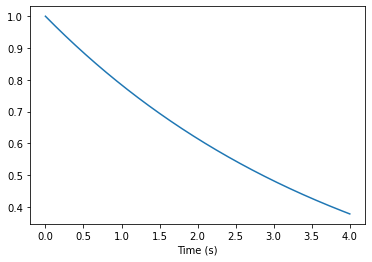

In [10]:
#generating uniformly dist from 0 - 3 with a size of 10,000
Y = np.random.uniform(0, 3, size= 10000)
print(Y)

matrix = np.zeros((10000, 4000)) #4000 mili-sec
timestamps = np.linspace(0, 4, 4000)
print(timestamps.shape)
for i in range(10000):
    matrix[i] = np.exp(-Y[i]*timestamps)
print(matrix)
plt.plot(timestamps, matrix[100], label="Theoretical")
plt.xlabel("Time (s)")

# Question 6
### Use your 10,000 waveform ensemble from Problem 5 to numerically calculate a histogram that represents the first order PDF of this stochastic process. Normalize your histogram to have the same area as a PDF and plot your histogram on the same figure as the theoretical expression for the first order PDF for this stochastic process. They should match. You can generate your plot for a single time sample that does a good job of illustrating the zero and non-zero regions of the PDF.

0.9994270468604536


Text(0.5, 1.0, 'At single time sample 0.75s')

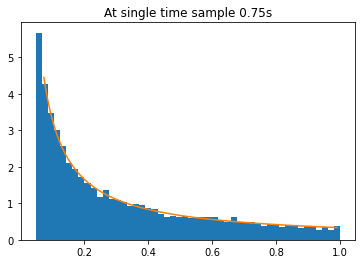

In [11]:
# Plotting first order PDF at 0.75Sec(750 timestamp)
#using matrix from the previous Question
bins = 50
count, bins, ignored = plt.hist(matrix[:, 1000], bins, density = True)

x_axis_th = np.linspace(0.075, 0.99, 10000)
y_axis_th = 1/(3*abs(1*x_axis_th))
print(np.max(matrix[:, 1000]))

plt.plot(x_axis_th, y_axis_th, label="Theoretical")
plt.title("At single time sample 0.75s")


# Question 7
### Use your 10,000 waveform ensemble from Problem 5 to numerically calculate the mean of the stochastic process. Plot the numerical mean along with the theoretical mean expression on the same figure. They should match.

In [12]:
exp_mean = []
for i in range(4000):
    exp_mean.append(np.mean(matrix[:, i]))

ther_mean = []
for i in range(4000):
    ther_mean.append((1-np.exp(-3*i/1000))/(3*i/1000))

print(len(exp_mean))
print(len(ther_mean))
# Exponential Distribution
x_axis_mean = np.linspace(0, 4, 4000)

4000
4000


/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


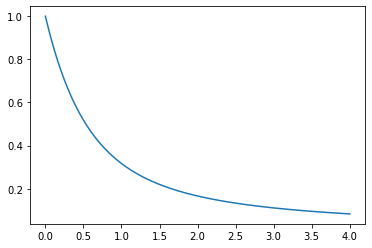

In [13]:
plt.plot(x_axis_mean, ther_mean, label="Theoretical")

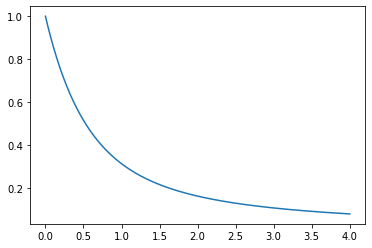

In [14]:
plt.plot(x_axis_mean, exp_mean, label="Experimental")

### As it can be seen above that they match